# Coding Final
### Jason Zhou
### MTH437 
### Spring 2020



In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## 1. [25 points] The following is the SIR model, which is a popular model for simulating epidemics: S stands for susceptible, I stands for infected, and R stands for recovered.


#### $$ \begin{cases}  \frac{dS}{dt} = -\beta IS  \\ \frac{dI}{dt} = \beta IS - \gamma I \\ \frac{dR}{dt} = \gamma I \end{cases} $$
 
Variables: <br><br> S(t) stands for fraction of susceptible people <br> I(t) stands for the fraction of infected people <br> R(t) stands for the fraction of recovered people. <br><br>

The parameter $\beta > 0$ denotes the infection rate <br> The parameter $\gamma > 0$ denotes the healing rate <br> The effective spreading rate is $R_o = \frac{\beta}{\gamma}$ and the infection will grow when $R_o > 1$



# 1A

Equation 1 has no dependence on time, therefore the system of equations is autonomous.  

# 1B

$$ f_1(y(t)) = -\beta I(t)S(t)$$ <br>
$$ f_2(y(t)) = \beta I(t)S(t) - \gamma I(t)$$ <br>
$$ f_3(y(t)) = \gamma I(t) $$

# 1C

In [2]:
def simulate_SIR(gamma,beta,T,dt,y0):

    ti = linspace(0,T*dt,T)# time steps
    y = zeros((T,3))# row i contains y_i
    y[0] = y0# initial condition

    for t in range(0,T-1):
        S = y[t,0]
        I = y[t,1]
        R = y[t,2]
        
        # Forward Euler
        f1 = -beta*I*S #dS/dt
        f2 = beta*I*S - gamma*I #dI/dt
        f3 = gamma*I
        S = S + dt*f1
        I = I + dt*f2
        R = R + dt*f3
        y[t+1] = [S,I,R]
        
    return ti,y

def plot_SIR(ti,y,ax):
    ax.plot(ti,y[:,0])
    ax.plot(ti,y[:,1])
    ax.plot(ti,y[:,2])
    ax.legend(['Susceptible, S','Infected, I','Recovered, R'])
    ax.set_xlabel('time, t')
    ax.set_ylabel('level of infection')

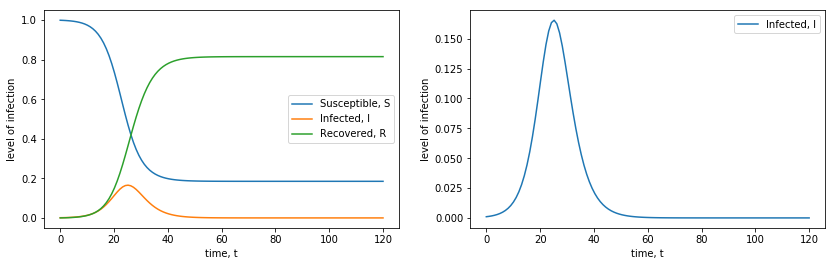

In [3]:
gamma = 0.3 # recovery rate
T = 120
h = 1
y0 = [0.999,0.001,0]

fig, ax = plt.subplots(1,2,figsize=(14,4))

beta = 0.6 # infection rate
ti,y = simulate_SIR(gamma,beta,T,h,y0)
plot_SIR(ti,y,ax[0])
ax[1].plot(ti,y[:,1])
ax[1].legend(['Infected, I'])
ax[1].set_xlabel('time, t')
ax[1].set_ylabel('level of infection');

# 1D

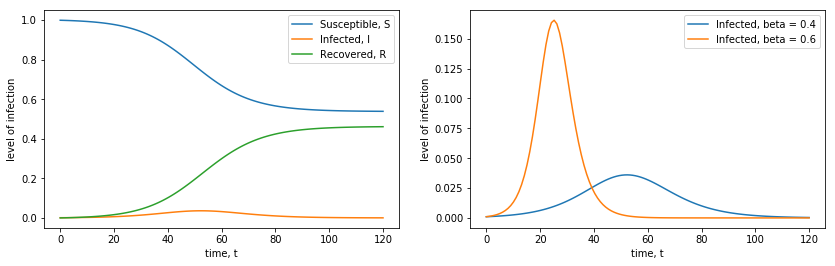

In [4]:
fig, ax = plt.subplots(1,2,figsize=(14,4))

beta = 0.4 # infection rate
ti1,y1 = simulate_SIR(gamma,beta,T,h,y0)
plot_SIR(ti1,y1,ax[0])

ax[1].plot(ti1,y1[:,1])
ax[1].plot(ti,y[:,1])
ax[1].legend(['Infected, beta = 0.4','Infected, beta = 0.6'])
ax[1].set_xlabel('time, t')
ax[1].set_ylabel('level of infection');

# 1E

In [5]:
def simulate_SIR1(gamma,beta,T,dt,y0):
    
    ti = linspace(0,T*dt,T)# time steps
    y = zeros((T,3))# row i contains y_i
    y[0] = y0# initial condition

    for t in range(0,T-1):
        if t <= 70:
            beta = 0.4
        else:
            beta = 0.6
            
        S = y[t,0]
        I = y[t,1]
        R = y[t,2]

        # Forward Euler
        f1 = -beta*I*S #dS/dt
        f2 = beta*I*S - gamma*I #dI/dt
        f3 = gamma*I
        S = S + dt*f1
        I = I + dt*f2
        R = R + dt*f3
        y[t+1] = [S,I,R]
        
    return ti,y

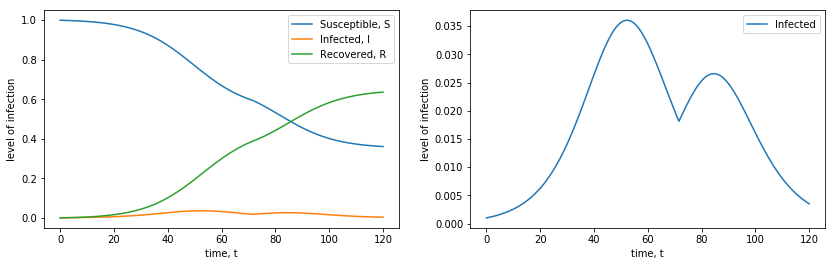

In [6]:
fig, ax = plt.subplots(1,2,figsize=(14,4))
gamma = 0.3
T = 120
y0 = [0.999,0.001,0]

ti,y = simulate_SIR1(gamma,beta,T,h,y0)
plot_SIR(ti,y,ax[0])

ax[1].plot(ti,y[:,1])
ax[1].legend(['Infected'])
ax[1].set_xlabel('time, t')
ax[1].set_ylabel('level of infection');

# 1F

I decided to see how the model would change by tweaking the healing rate $\gamma$. I used the system: <br> $$ \gamma(t) =  \begin{cases} 0.4 , t <= 50 \\ 0.6 , t < 100 \\ 0.3 , else \end{cases} $$

In [7]:
def simulate_SIR2(gamma,beta,T,dt,y0):
    
    ti = linspace(0,T*dt,T)# time steps
    y = zeros((T,3))# row i contains y_i
    y[0] = y0# initial condition

    for t in range(0,T-1):
        if t <= 50:
            gamma = 0.4
        elif t < 100:
            gamma = 0.6 
        else:
            gamma = 0.3
            
        S = y[t,0]
        I = y[t,1]
        R = y[t,2]

        # Forward Euler
        f1 = -beta*I*S #dS/dt
        f2 = beta*I*S - gamma*I #dI/dt
        f3 = gamma*I
        S = S + dt*f1
        I = I + dt*f2
        R = R + dt*f3
        y[t+1] = [S,I,R]
        
    return ti,y

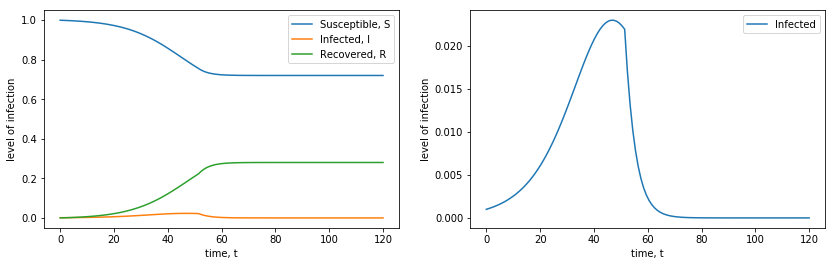

In [8]:
fig, ax = plt.subplots(1,2,figsize=(14,4))
beta = 0.5
T = 120
y0 = [0.999,0.001,0]

ti,y = simulate_SIR2(gamma,beta,T,h,y0)
plot_SIR(ti,y,ax[0])

ax[1].plot(ti,y[:,1])
ax[1].legend(['Infected'])
ax[1].set_xlabel('time, t')
ax[1].set_ylabel('level of infection');

From the code using $\beta = 0.5$, I noticed that the trend is still the same until $t > 50$, then $\gamma$ increases to 0.6 until $t > 100$. I expected a higher recovery rate but the results are still within my expectations since I made the infection rate so high. I also noticed that the level of infection significantly decreases as $t>50$.

# 2 [25 points] Use the provided data to study the COVID-19 cases in the different counties of New York State.

#### The data was downoaded from  https://github.com/CSSEGISandData/COVID-19 on May 7, 2020

Below you can see the raw data in the .csv file

In [9]:
import pandas as pd
df = pd.read_csv('time_series_covid19_confirmed_US.csv')
df = df.set_index('Combined_Key') #df.loc[0] # show the data frame
df.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20
Combined_Key,,,,,,,,,,,,,,,,,,,,,
"American Samoa, US",16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
"Guam, US",316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,141,141,145,145,145,145,145,145,149,149
"Northern Mariana Islands, US",580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,14,14,14,14,14,14,14,14,15,15
"Puerto Rico, US",630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,1400,1433,1539,1575,1757,1808,1843,1924,1968,2031
"Virgin Islands, US",850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,57,57,66,66,66,66,66,66,66,66


### Next, extract the counties for New York state using a function that selects data for a given state

In [10]:
# given a a state, this function returns the names of counties and the numbers of infection persons in those counties over time
def get_state_county_data(df,Province_State):
    County_Data = df.loc[df['Province_State'] == Province_State]
    cols_to_delete = ['UID', 'iso2','iso3','code3','FIPS','Admin2','Province_State','Country_Region','Lat','Long_']
    County_Data = County_Data.drop(columns=cols_to_delete)
    County_Names = County_Data.index
    County_Names = [ name.split(',')[0] for name in County_Names]
    infection_counts = County_Data.to_numpy()
    return County_Names,infection_counts

In [11]:
Province_State = 'New York'
county_names,county_data = get_state_county_data(df,Province_State);
# county_names contains the names of counties in NY
# county_data is a numpy matrix in which row t is the number of infections in county t

for i,county in enumerate(county_names):
    print(i,county)

0 Albany
1 Allegany
2 Bronx
3 Broome
4 Cattaraugus
5 Cayuga
6 Chautauqua
7 Chemung
8 Chenango
9 Clinton
10 Columbia
11 Cortland
12 Delaware
13 Dutchess
14 Erie
15 Essex
16 Franklin
17 Fulton
18 Genesee
19 Greene
20 Hamilton
21 Herkimer
22 Jefferson
23 Kings
24 Lewis
25 Livingston
26 Madison
27 Monroe
28 Montgomery
29 Nassau
30 New York City
31 Niagara
32 Oneida
33 Onondaga
34 Ontario
35 Orange
36 Orleans
37 Oswego
38 Otsego
39 Putnam
40 Queens
41 Rensselaer
42 Richmond
43 Rockland
44 St. Lawrence
45 Saratoga
46 Schenectady
47 Schoharie
48 Schuyler
49 Seneca
50 Steuben
51 Suffolk
52 Sullivan
53 Tioga
54 Tompkins
55 Ulster
56 Warren
57 Washington
58 Wayne
59 Westchester
60 Wyoming
61 Yates
62 Out of NY
63 Unassigned


# Erie County is \#14 on the list

In [12]:
county_names[14]

'Erie'

### Row 14 contains the total infection count up to that day. Day 1 is Jan 22, 2020. Day 107 is May 7, 2020.

In [13]:
county_data[14]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    3,    3,    7,
         11,   20,   28,   47,   50,   56,   87,  114,  122,  206,  245,
        318,  414,  443,  499,  582,  617,  734,  808, 1059, 1148, 1234,
       1335, 1432, 1498, 1506, 1571, 1661, 1730, 1812, 1951, 2023, 2023,
       2192, 2192, 2284, 2284, 2450, 2603, 2773, 2954, 3021, 3089, 3196,
       3319, 3481, 3598, 3710, 3802, 3891, 4008, 4136])

### Let's plot the running totals of infections vs time for every NY county

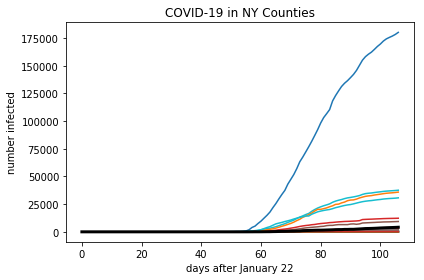

In [14]:
for i in range(len(county_data)):
    plt.plot(county_data[i]);
    
plt.plot(county_data[14],'k',linewidth=3);

#plt.legend(county_names)
plt.xlabel('days after January 22')
plt.ylabel('number infected');    
plt.title('COVID-19 in NY Counties');
plt.tight_layout()
savefig('counties.pdf')

# 2B

In [15]:
def makeY(data):
    index = len(data) - 28
    Y = ones(28)
    for i in range(0,28):
        Y[i] = data[index]
        index += 1
    return Y

def makeX(data):
    index = len(data) - 28
    X = ones((28,2))
    for i in range(0,28):
        X[i,1] = index
        index += 1
    return X

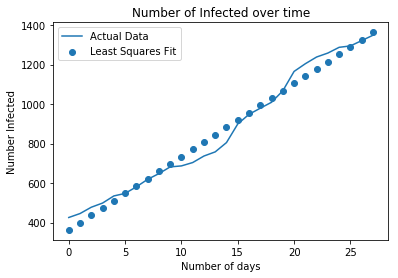

In [16]:
t = linspace(0,27,28)
s = len(county_data[0]) - 28
Y = makeY(county_data[0])
X = makeX(county_data[0])
Xi = dot(X.T,X)
Xi = inv(Xi)
Xi = dot(Xi,X.T)
a = dot(Xi,Y)
pts = dot(X,a)

scatter(t,pts,label='Least Squares Fit')
plot(t,county_data[0][s:],label='Actual Data')
xlabel('Number of days')
ylabel('Number Infected')
title('Number of Infected over time')
legend()
show()

# 2C

In [17]:
x = [1,X[-1,-1] + 7]
y = dot(x,a)
print(y)

1622.5333880678536


The model projects that the estimated number of infected people in Albany County on May 14th is 1622.5333880678536.

# 2E

## Erie County

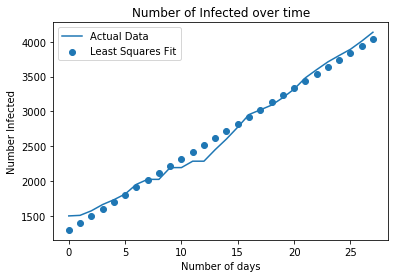

In [18]:
t = linspace(0,27,28)
s = len(county_data[14]) - 28
Y = makeY(county_data[14])
X = makeX(county_data[14])
Xi = dot(X.T,X)
Xi = inv(Xi)
Xi = dot(Xi,X.T)
a = dot(Xi,Y)
pts = dot(X,a)

scatter(t,pts,label='Least Squares Fit')
plot(t,county_data[14][s:],label='Actual Data')
xlabel('Number of days')
ylabel('Number Infected')
title('Number of Infected over time')
legend()
show()

In [19]:
x = [1,X[-1,-1] + 7]
y = dot(x,a)
print(y)

4754.85823754784


The model projects that the estimated number of infected people in Erie County on May 14th is 4754.85823754784.

## Monroe County

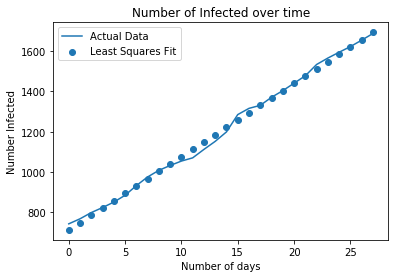

In [20]:
t = linspace(0,27,28)
s = len(county_data[27]) - 28
Y = makeY(county_data[27])
X = makeX(county_data[27])
Xi = dot(X.T,X)
Xi = inv(Xi)
Xi = dot(Xi,X.T)
a = dot(Xi,Y)
pts = dot(X,a)

scatter(t,pts,label='Least Squares Fit')
plot(t,county_data[27][s:],label='Actual Data')
xlabel('Number of days')
ylabel('Number Infected')
title('Number of Infected over time')
legend()
show()

In [21]:
x = [1,X[-1,-1] + 7]
y = dot(x,a)
print(y)

1949.0528188286576


The model projects that the estimated number of infected people in Monroe County on May 14th is 1949.0528188286576.

## Niagara County

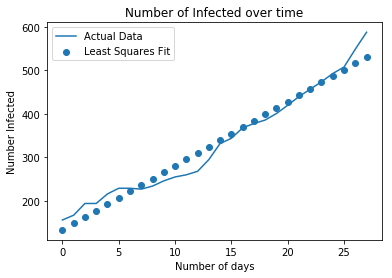

In [22]:
t = linspace(0,27,28)
s = len(county_data[31]) - 28
Y = makeY(county_data[31])
X = makeX(county_data[31])
Xi = dot(X.T,X)
Xi = inv(Xi)
Xi = dot(Xi,X.T)
a = dot(Xi,Y)
pts = dot(X,a)

scatter(t,pts,label='Least Squares Fit')
plot(t,county_data[31][s:],label='Actual Data')
xlabel('Number of days')
ylabel('Number Infected')
title('Number of Infected over time')
legend()
show()

In [23]:
x = [1,X[-1,-1] + 7]
y = dot(x,a)
print(y)

634.9915161466813


The model projects that the estimated number of infected people in Niagara County on May 14th is 634.9915161466813.

# 2F

In [24]:
def makeY(data):
    index = len(data) - 7
    Y = ones(7)
    for i in range(0,7):
        Y[i] = data[index]
        index += 1
    return Y

def makeX(data):
    index = len(data) - 7
    X = ones((7,2))
    for i in range(0,7):
        X[i,1] = index
        index += 1
    return X

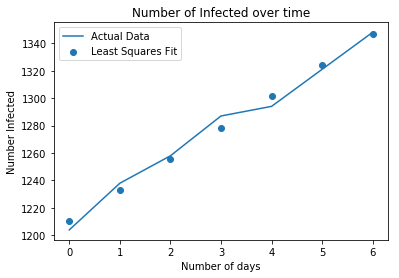

In [25]:
t = linspace(0,6,7)
s = len(county_data[0]) - 7
Y = makeY(county_data[0])
X = makeX(county_data[0])
Xi = dot(X.T,X)
Xi = inv(Xi)
Xi = dot(Xi,X.T)
a = dot(Xi,Y)
pts = dot(X,a)

scatter(t,pts,label='Least Squares Fit')
plot(t,county_data[0][s:],label='Actual Data')
xlabel('Number of days')
ylabel('Number Infected')
title('Number of Infected over time')
legend()
show()

In [26]:
x = [1,X[-1,-1] + 7]
y = dot(x,a)
print(y)

1504.9999999999818


The model projects that the estimated number of infected people in Albany County on May 14th is 1504.9999999999818. This number is much less than our previous estimate of 1622.5333880678536. Using more recent data and a smaller timeframe will give us a better linear fit for our model.

# 2G

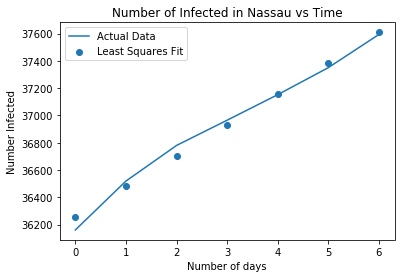

In [27]:
s = len(county_data[29]) - 7
Y = makeY(county_data[29])
X = makeX(county_data[29])
Xi = dot(X.T,X)
Xi = inv(Xi)
Xi = dot(Xi,X.T)
a = dot(Xi,Y)
pts = dot(X,a)

scatter(t,pts,label='Least Squares Fit')
plot(t,county_data[29][s:],label='Actual Data')
xlabel('Number of days')
ylabel('Number Infected')
title('Number of Infected in Nassau vs Time')
legend()
show()

x = [1,X[-1,-1] + 7]
y1 = dot(x,a)

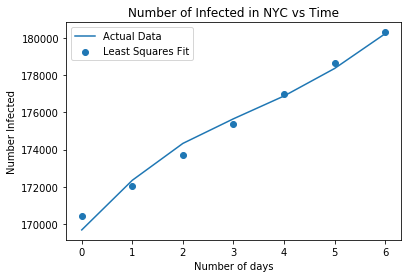

In [28]:
s = len(county_data[30]) - 7
Y = makeY(county_data[30])
X = makeX(county_data[30])
Xi = dot(X.T,X)
Xi = inv(Xi)
Xi = dot(Xi,X.T)
a = dot(Xi,Y)
pts = dot(X,a)

scatter(t,pts,label='Least Squares Fit')
plot(t,county_data[30][s:],label='Actual Data')
xlabel('Number of days')
ylabel('Number Infected')
title('Number of Infected in NYC vs Time')
legend()
show()

x = [1,X[-1,-1] + 7]
y2 = dot(x,a)

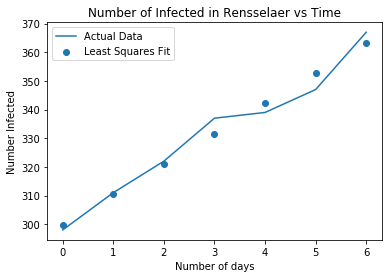

In [29]:
s = len(county_data[41]) - 7
Y = makeY(county_data[41])
X = makeX(county_data[41])
Xi = dot(X.T,X)
Xi = inv(Xi)
Xi = dot(Xi,X.T)
a = dot(Xi,Y)
pts = dot(X,a)

scatter(t,pts,label='Least Squares Fit')
plot(t,county_data[41][s:],label='Actual Data')
xlabel('Number of days')
ylabel('Number Infected')
title('Number of Infected in Rensselaer vs Time')
legend()
show()

x = [1,X[-1,-1] + 7]
y3 = dot(x,a)

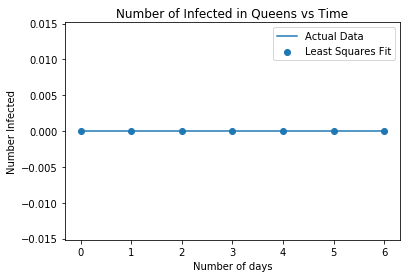

In [30]:
s = len(county_data[40]) - 7
Y = makeY(county_data[40])
X = makeX(county_data[40])
Xi = dot(X.T,X)
Xi = inv(Xi)
Xi = dot(Xi,X.T)
a = dot(Xi,Y)
pts = dot(X,a)

scatter(t,pts,label='Least Squares Fit')
plot(t,county_data[40][s:],label='Actual Data')
xlabel('Number of days')
ylabel('Number Infected')
title('Number of Infected in Queens vs Time')
legend()
show()

x = [1,X[-1,-1] + 7]
y4 = dot(x,a)

In [31]:
print(y1,y2,y3,y4)

39192.14285714124 191822.07142856548 437.285714285719 0.0


The model predicts that on May 14th, the number of Infected in Rensselaer is 437.285714285719, the number of Infected in NYC is 191822.07142856548, the number of Infected in Nassau is 39192.14285714124, and the number of Infected in Queens is 0.